<font size = "5"> **EELS_Tools:  [Spectroscopy](../4_EELS_Tools.ipynb)** </font>

<hr style="height:1px;border-top:4px solid #FF8200" />

# Analysis of EDS Spectra
<br>

[<img src=https://www.coeuscreativegroup.com/wp-content/uploads/2020/04/download-button.png, width=125>](https://raw.githubusercontent.com/pycroscopy/pyTEMlib/main/notebooks/Spectroscopy/EDS.ipynb) 

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/pycroscopy/pyTEMlib/blob/main/notebooks/Spectroscopy/EDS.ipynb)
    
part of 

<font size = "5"> **[pyTEMlib](https://pycroscopy.github.io/pyTEMlib/about.html)**</font>

a [pycroscopy](https://pycroscopy.github.io/pycroscopy/about.html) ecosystem package



Notebook by Gerd Duscher, 2025

Microscopy Facilities<br>
Institute of Advanced Materials & Manufacturing<br>
The University of Tennessee, Knoxville

Model based analysis and quantification of data acquired with transmission electron microscopes

## Content
An Introduction into displaying and analyzing EDS spectrum images and spectra
This works also on Google Colab.


## Prerequesites

### Install pyTEMlib

If you have not done so in the [Introduction Notebook](_.ipynb), please test and install [pyTEMlib](https://github.com/gduscher/pyTEMlib) and other important packages with the code cell below.


In [1]:
import sys
import importlib.metadata

def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = importlib.metadata.version(package_name)
    except importlib.metadata.PackageNotFoundError:
        version = '-1'
    return version


# pyTEMlib setup ------------------
if test_package('pyTEMlib') < '0.2024.02.0':
    print('installing pyTEMlib')
   
    !{sys.executable} -m pip install pyTEMlib -q --upgrade

# ------------------------------
print('done')

done


**In Google Colab: Please restart runtime Ctrl+M**

### Loading of necessary libraries

Please note, that we only need to load the pyTEMlib library, which is based on sidpy Datsets.



In [1]:
%matplotlib widget
import numpy as np
import scipy

import matplotlib.pylab as plt
import sys

if 'google.colab' in sys.modules:
    from google.colab import output
    output.enable_custom_widget_manager()
    from google.colab import drive
sys.path.insert(0, '..//..//')
%load_ext autoreload
%autoreload 2

import pyTEMlib

    # using  pyTEMlib.eds_tools, pyTEMlib.file_tools and pyTEMlib.eels_tools (for line definitions)
if 'google.colab' in sys.modules:
    drive.mount("/content/drive")

# For archiving reasons it is a good idea to print the version numbers out at this point
print('pyTEM version: ',pyTEMlib.__version__)
__notebook__ = 'EDS_Spectrum_Analysis'
__notebook_version__ = '2025_09_23'

You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
pyTEM version:  0.2025.09.3


## Open File

### Load File

Select a main dataset and any additional data like reference data and such.

In [139]:
fileWidget = pyTEMlib.file_tools.FileWidget()

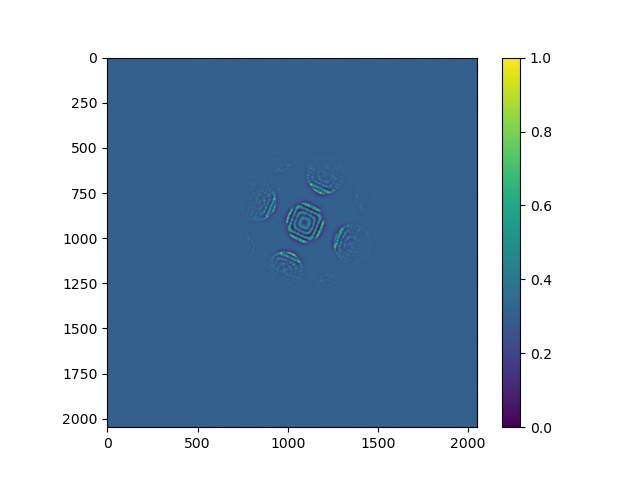

In [138]:
import skimage
cbed =fileWidget.selected_dataset
cbed-=cbed.min()
cbed /=cbed.max()
cbed =  np.log(10.1+cbed)
cbed = skimage.filters.difference_of_gaussians(np.array(cbed), 1, 12)
cbed-=cbed.min()
cbed2 = cbed/cbed.max()
plt.figure()
plt.imshow(cbed2.T)
plt.colorbar()

(256, 256)


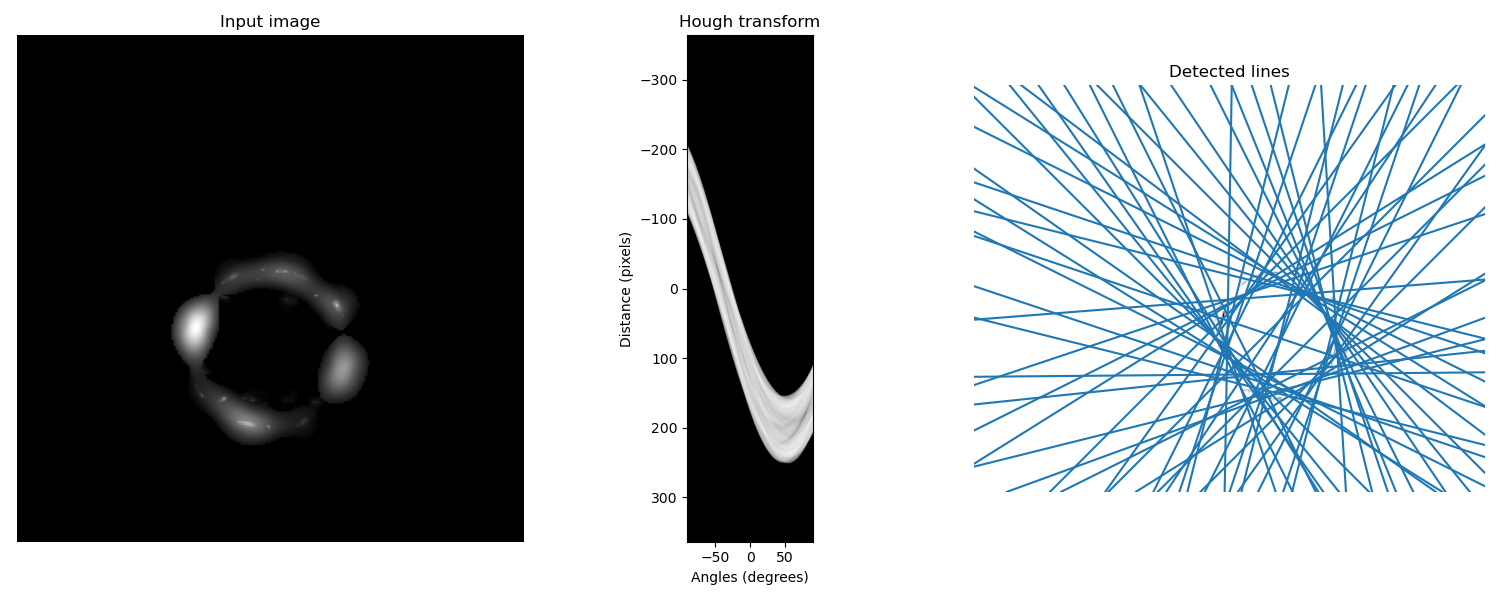

In [133]:
from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line as draw_line

from skimage import feature
import matplotlib.pyplot as plt
from matplotlib import cm


# Constructing test image
image = cbed2
image = cbed2

image = rebin(image, [256,256])
print(image.shape)
from skimage.filters import meijering, sato, frangi, hessian


edges = meijering(image)
#edges = feature.canny(edges, sigma=.1)
# Classic straight-line Hough transform
# Set a precision of 0.5 degree.
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(edges, theta=tested_angles)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(edges, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [
    np.rad2deg(theta[0] - angle_step),
    np.rad2deg(theta[-1] + angle_step),
    d[-1] + d_step,
    d[0] - d_step,
]
ax[1].imshow(np.log(1 + h), extent=bounds, cmap=cm.gray, aspect=1 / 1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(rebin(cbed2,[256,256]), cmap=cm.gray)
#ax[2].imshow(edges, cmap=cm.gray)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[2].axline((x0, y0), slope=np.tan(angle + np.pi / 2))

plt.tight_layout()
plt.show()

(256, 256)


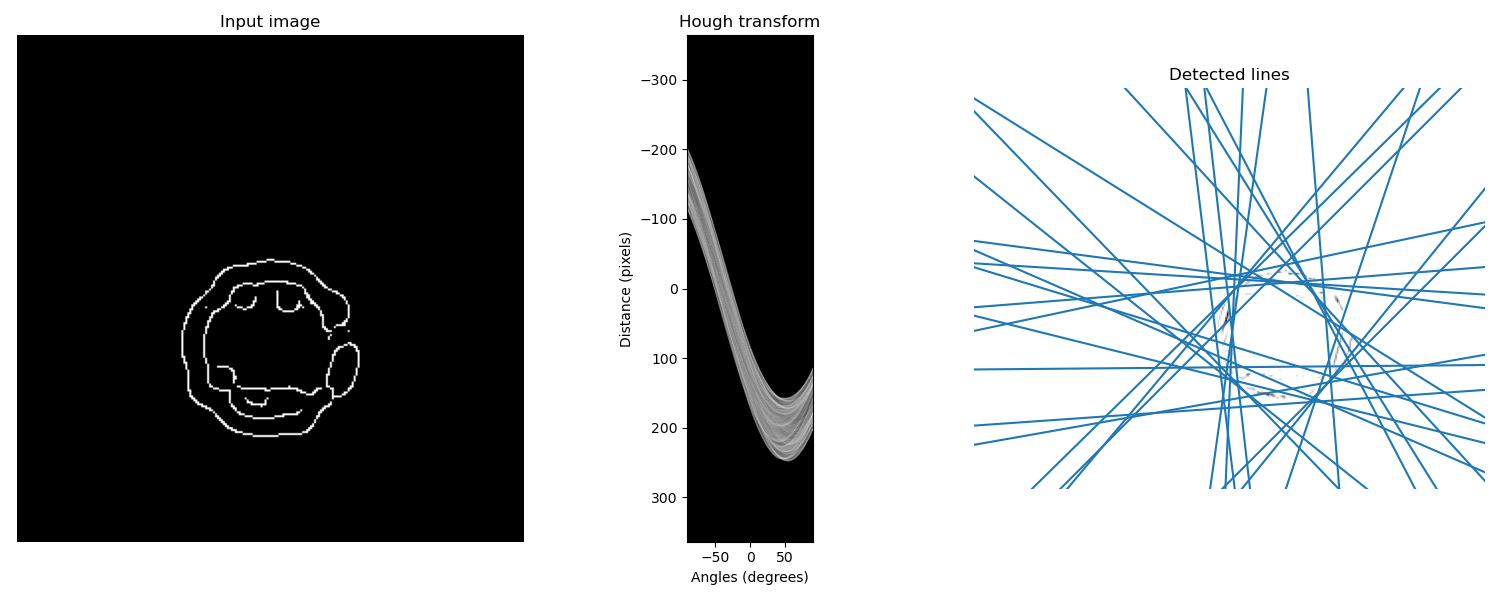

In [134]:
from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line as draw_line

from skimage import feature
import matplotlib.pyplot as plt
from matplotlib import cm


# Constructing test image
image = cbed2
#image[image<-.2] = -.2
#image[image>.2] = .2
image = rebin(image, [256,256])
print(image.shape)
from skimage.filters import meijering, sato, frangi, hessian


edges = hessian(image, range(1, 5))
edges = feature.canny(edges, sigma=4.5)
# Classic straight-line Hough transform
# Set a precision of 0.5 degree.
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(edges, theta=tested_angles)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(edges, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [
    np.rad2deg(theta[0] - angle_step),
    np.rad2deg(theta[-1] + angle_step),
    d[-1] + d_step,
    d[0] - d_step,
]
ax[1].imshow(np.log(1 + h), extent=bounds, cmap=cm.gray, aspect=1 / 1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(rebin(cbed2,[256,256]), cmap=cm.gray)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[2].axline((x0, y0), slope=np.tan(angle + np.pi / 2))

plt.tight_layout()
plt.show()

### Select and Plot Dataset

Select a dataset from the drop down value and display it with the code cell below.

Here we sum the spectra of the 4 quadrants and define the detector parameter.

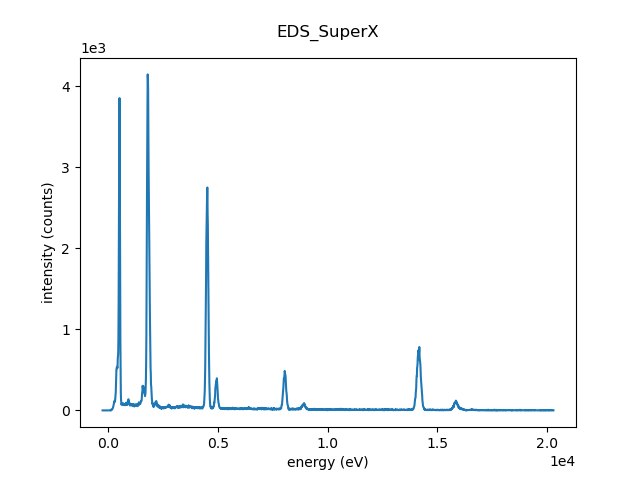

In [4]:
spectrum = fileWidget.selected_dataset
import pyTEMlib.eds_xsections
start = np.searchsorted(spectrum.energy_scale.values, 100)
energy_scale = spectrum.energy_scale.values[start:]
detector_Efficiency= pyTEMlib.eds_tools.detector_response(spectrum)  # tags, spectrum.energy_scale.values[start:])
if 'start_energy' not in spectrum.metadata['EDS']['detector']:
    spectrum.metadata['EDS']['detector']['start_energy'] = 120
spectrum[:np.searchsorted(spectrum.energy_scale.values,spectrum.metadata['EDS']['detector']['start_energy'])] = 0.
spectrum.metadata['EDS']['detector']['detector_efficiency']  = detector_Efficiency
view = spectrum.plot()

## Find Elements 

C:\Users\gduscher\AppData\Local\anaconda3\Lib\site-packages\dask\array\core.py:1744: FutureWarning: The `numpy.argsort` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(


['Cu', 'Sr', 'Ti', 'O']


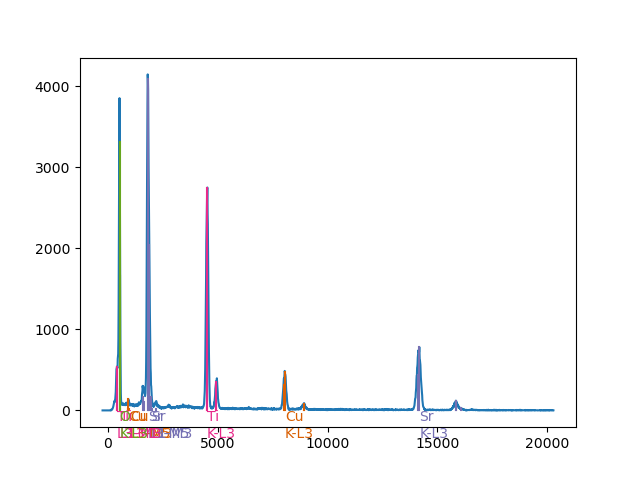

In [5]:
# --------Input -----------
minimum_number_of_peaks = 10
# --------------------------
minor_peaks = pyTEMlib.eds_tools.detect_peaks(spectrum, minimum_number_of_peaks=minimum_number_of_peaks)

keys = list(spectrum.metadata['EDS'].keys())
for key in keys:
    if len(key) < 3:
        del spectrum.metadata['EDS'][key]

elements = pyTEMlib.eds_tools.find_elements(spectrum, minor_peaks)

print(elements)
spectrum.metadata['EDS'].update(pyTEMlib.eds_tools.get_x_ray_lines(spectrum, elements))
plt.figure()
plt.plot(spectrum.energy_scale,spectrum, label = 'spectrum')
pyTEMlib.eds_tools.plot_lines(spectrum.metadata['EDS'], plt.gca())


## Quantify

### Fit spectrum

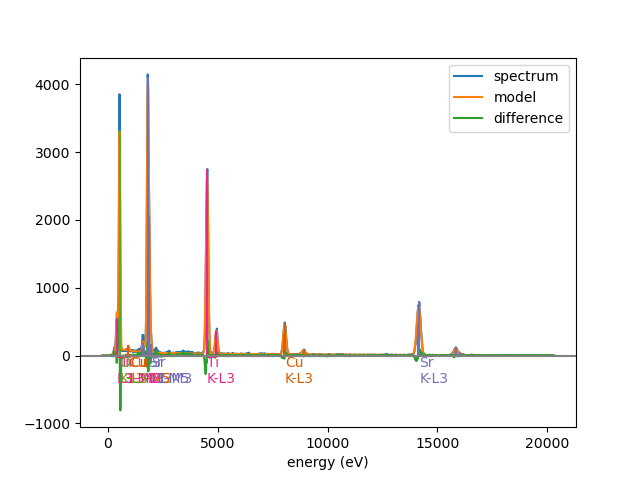

In [6]:
peaks, pp = pyTEMlib.eds_tools.fit_model(spectrum, use_detector_efficiency=True)
model = pyTEMlib.eds_tools.get_model(spectrum)

plt.figure()
plt.plot(spectrum.energy_scale, spectrum, label='spectrum')
plt.plot(spectrum.energy_scale, model, label='model')
plt.plot(spectrum.energy_scale, spectrum-model, label='difference')
plt.xlabel('energy (eV)')
pyTEMlib.eds_tools.plot_lines(spectrum.metadata['EDS'], plt.gca())
plt.axhline(y=0, xmin=0, xmax=1, color='gray')
plt.legend()

### Quantify Spectrum
first with Bote-Salvat cross section

In [37]:
pyTEMlib.eds_tools.quantify_EDS(spectrum, mask =['Cu'])

using cross sections for quantification


KeyError: 'L1K'

In [86]:
def rad_ionization (shell) :
        regex = r"([K-M])([0-9]?)"
        cs = 0
        for key in shell_dict.keys() :
            print(key)
            shell_group = re.match(regex,shell).group(1)
            key_group = re.match(regex,key).group(1)
            if shell_group < key_group :
                tr_dict = create_transition_dict(key,line_dict)
                print(tr_dict)
rad_ionization('K')

K
L1
{'L1L2': -30, 'L1L3': -31, 'L1M1': -32, 'L1M2': -33, 'L1M3': -34, 'L1M4': -35, 'L1M5': -36, 'L1N1': -37, 'L1N2': -38, 'L1N3': -39, 'L1N4': -40, 'L1N5': -41, 'L1N6': -42, 'L1N7': -44, 'L1O1': -45, 'L1O2': -46, 'L1O3': -47, 'L1O4': -48, 'L1O5': -50, 'L1O6': -51, 'L1O7': -52, 'L1P1': -53, 'L1P2': -54, 'L1P3': -56, 'L1P4': -57, 'L1P5': -58}
L2
{'L2L3': -59, 'L2M1': -60, 'L2M2': -61, 'L2M3': -62, 'L2M4': -63, 'L2M5': -64, 'L2N1': -65, 'L2N2': -66, 'L2N3': -67, 'L2N4': -68, 'L2N5': -69, 'L2N6': -70, 'L2N7': -71, 'L2O1': -72, 'L2O2': -73, 'L2O3': -74, 'L2O4': -75, 'L2O5': -76, 'L2O6': -77, 'L2O7': -78, 'L2P1': -79, 'L2P2': -80, 'L2P3': -82, 'L2P4': -83, 'L2P5': -84, 'L2Q1': -85}
L3
{'L3M1': -86, 'L3M2': -87, 'L3M3': -88, 'L3M4': -89, 'L3M5': -90, 'L3N1': -91, 'L3N2': -92, 'L3N3': -93, 'L3N4': -94, 'L3N5': -95, 'L3N6': -96, 'L3N7': -97, 'L3O1': -98, 'L3O2': -99, 'L3O3': -100, 'L3O4': -101, 'L3O5': -103, 'L3O6': -104, 'L3O7': -105, 'L3P1': -106, 'L3P2': -107, 'L3P3': -109, 'L3P4': -110, 'L

In [179]:
k_r = 0
l_r = 0
for key in line_dict.keys():
    if key[0] =='K':
        if key[2] in ['2', '3'] and key[1]in ['L', 'M']:
            line = getattr(xr, f"{key}_LINE")
            print(f"{key}_LINE")
            
            print(xr.FluorYield(26, 0))
            print(xr.RadRate(26, line))
            k_r += xr.RadRate(26, line)
    if key[0] =='M':
        if len(key) ==4:
            #if key[3] in ['1', '2', '3', '4', '5', '8', '9'] and key[2] < 'O':
            line = getattr(xr, f"{key}_LINE")
            print(f"{key}_LINE")
            
            print(xr.FluorYield(26, 0))
            try:
                l_r += xr.RadRate(66, line)
            except:
                pass
            print(l_r)
k_r

KL2_LINE
0.3546
0.29799
KL3_LINE
0.3546
0.58357
KM2_LINE
0.3546
0.03988
KM3_LINE
0.3546
0.07856
M1M2_LINE
0.3546
0.0073365
M1M3_LINE
0.3546
0.0641045
M1M4_LINE
0.3546
0.064126138
M1M5_LINE
0.3546
0.064155748
M1N1_LINE
0.3546
0.06415586242
M1N2_LINE
0.3546
0.5846858624200001
M1N3_LINE
0.3546
0.8732358624200001
M1N4_LINE
0.3546
0.87487036242
M1N5_LINE
0.3546
0.8763929624200001
M1N6_LINE
0.3546
0.8763965583200001
M1N7_LINE
0.3546
0.87640007882
M1O1_LINE
0.3546
0.8764001104420001
M1O2_LINE
0.3546
0.955674110442
M1O3_LINE
0.3546
0.999995110442
M1O4_LINE
0.3546
0.999995110442
M1O5_LINE
0.3546
0.999995110442
M1O6_LINE
0.3546
0.999995110442
M1O7_LINE
0.3546
0.999995110442
M1P1_LINE
0.3546
0.999995110442
M1P2_LINE
0.3546
0.999995110442
M1P3_LINE
0.3546
0.999995110442
M1P4_LINE
0.3546
0.999995110442
M1P5_LINE
0.3546
0.999995110442
M2M3_LINE
0.3546
0.9999971362419999
M2M4_LINE
0.3546
1.1354971362419999
M2M5_LINE
0.3546
1.1354971475359998
M2N1_LINE
0.3546
1.3631571475359998
M2N2_LINE
0.3546
1.3631

1.0

In [192]:
xraylib.EdgeEnergy(40, xraylib.O5_SHELL)

ValueError: Invalid shell for this atomic number

In [189]:
for i in range(17):
    print(i, xr.FluorYield(26, i))

0 0.3546
1 0.001
2 0.0036
3 0.0063
4 2.8e-06
5 1.6e-05


ValueError: Invalid shell for this atomic number

In [144]:
xr.RadRate(56, xr.LN4_LINE)

0.00063512

In [126]:
help(xr.RadRate)

Help on function RadRate in module xraylib:

RadRate(Z, line)
    RadRate(int Z, int line) -> double

    Parameters
    ----------
    Z: int
    line: int



In [77]:
import xraylib as xr
def create_line_dict():
    """
    Creation of the internal dict which stores every LINE macro from the xraylib.
    The dict has this structure : {"Line name": int}
    """
    re_line = r"([A-Z][0-9]?[A-Z][0-9])(_LINE)"
    line_dict = {}
    for key in xr.__dict__.keys():
        line = re.match(re_line, key)
        if line:
            line_dict[line.group(1)] = xr.__dict__[key]
    return line_dict

def create_transition_dict(shell, line_dict):
    """
    Generates a dictionary of the lines associated with the given shell.
    The dict has this structure : {"line_name":int}
    """
    transition_dict = {}
    regex = shell + r"[H-Z][0-9]"
    for line in line_dict.keys():
        if re.match(regex, line):
            transition_dict[line] = line_dict[line]
    return transition_dict

def create_shell_dict():
    """
    Creation of the internal dict which stores every SHELL macro from the xraylib.
    The dict has this structure : {"Shell name": int}
    """
    re_shell = r"([K-M][0-9]?)(_SHELL)"
    shell_dict = {}
    for key in xr.__dict__.keys():
        shell = re.match(re_shell, key)
        if shell:
            shell_dict[shell.group(1)] = xr.__dict__[key]
    return shell_dict
shell_dict = create_shell_dict()
line_dict = create_line_dict()
shell= 'K'
create_transition_dict(shell, line_dict)

{'KL1': -1,
 'KL2': -2,
 'KL3': -3,
 'KM1': -4,
 'KM2': -5,
 'KM3': -6,
 'KM4': -7,
 'KM5': -8,
 'KN1': -9,
 'KN2': -10,
 'KN3': -11,
 'KN4': -12,
 'KN5': -13,
 'KN6': -14,
 'KN7': -15,
 'KO1': -17,
 'KO2': -18,
 'KO3': -19,
 'KO4': -20,
 'KO5': -21,
 'KO6': -22,
 'KO7': -23,
 'KP1': -25,
 'KP2': -26,
 'KP3': -27,
 'KP4': -28,
 'KP5': -29}

In [174]:
import xraylib
xraylib.KL2_LINE

-2

In [42]:
q_dict = pyTEMlib.eds_tools.load_k_factors()
tags = pyTEMlib.eds_tools.quantify_EDS(spectrum, q_dict, mask = ['Cu'])

using k-factors for quantification
Sr: 21.87 at% 49.34 wt%
O : 55.62 at% 22.91 wt%
Ti: 22.51 at% 27.74 wt%
excluded from quantification  ['Cu']


In [36]:
import xraylib
xraylib.KL1_LINE

-1

In [34]:
import re 
re_line = r"([A-Z][0-9]?[A-Z][0-9])(_LINE)"
line_dict = {}
for key in xraylib.__dict__.keys():
    line = re.match(re_line, key)
    if line is not None:
        print(key, xraylib.__dict__[key])

KL1_LINE -1
KL2_LINE -2
KL3_LINE -3
KM1_LINE -4
KM2_LINE -5
KM3_LINE -6
KM4_LINE -7
KM5_LINE -8
KN1_LINE -9
KN2_LINE -10
KN3_LINE -11
KN4_LINE -12
KN5_LINE -13
KN6_LINE -14
KN7_LINE -15
KO1_LINE -17
KO2_LINE -18
KO3_LINE -19
KO4_LINE -20
KO5_LINE -21
KO6_LINE -22
KO7_LINE -23
KP1_LINE -25
KP2_LINE -26
KP3_LINE -27
KP4_LINE -28
KP5_LINE -29
L1L2_LINE -30
L1L3_LINE -31
L1M1_LINE -32
L1M2_LINE -33
L1M3_LINE -34
L1M4_LINE -35
L1M5_LINE -36
L1N1_LINE -37
L1N2_LINE -38
L1N3_LINE -39
L1N4_LINE -40
L1N5_LINE -41
L1N6_LINE -42
L1N7_LINE -44
L1O1_LINE -45
L1O2_LINE -46
L1O3_LINE -47
L1O4_LINE -48
L1O5_LINE -50
L1O6_LINE -51
L1O7_LINE -52
L1P1_LINE -53
L1P2_LINE -54
L1P3_LINE -56
L1P4_LINE -57
L1P5_LINE -58
L2L3_LINE -59
L2M1_LINE -60
L2M2_LINE -61
L2M3_LINE -62
L2M4_LINE -63
L2M5_LINE -64
L2N1_LINE -65
L2N2_LINE -66
L2N3_LINE -67
L2N4_LINE -68
L2N5_LINE -69
L2N6_LINE -70
L2N7_LINE -71
L2O1_LINE -72
L2O2_LINE -73
L2O3_LINE -74
L2O4_LINE -75
L2O5_LINE -76
L2O6_LINE -77
L2O7_LINE -78
L2P1_LINE -79


In [26]:
spectrum.metadata['EDS']['GUI']

{'Cu': {'symmetry': 'K-family'},
 'Sr': {'symmetry': 'K-family'},
 'Ti': {'symmetry': 'K-family'},
 'O': {'symmetry': 'K-family'}}

In [19]:
for key, item  in spectrum.metadata['EDS']['quantification'].items():
    print(key, item.get('atom%',0))

[autoreload of pyTEMlib.eds_tools failed: Traceback (most recent call last):
  File "C:\Users\gduscher\AppData\Local\anaconda3\Lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
    ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gduscher\AppData\Local\anaconda3\Lib\site-packages\IPython\extensions\autoreload.py", line 475, in superreload
    module = reload(module)
  File "C:\Users\gduscher\AppData\Local\anaconda3\Lib\importlib\__init__.py", line 129, in reload
    _bootstrap._exec(spec, module)
    ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 866, in _exec
  File "<frozen importlib._bootstrap_external>", line 1022, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1160, in get_code
  File "<frozen importlib._bootstrap_external>", line 1090, in source_to_code
  File "<frozen importlib._bootstrap>", line 488, in _call_with_frames_removed
  File "C:\Users\gdusche

KeyError: 'quantification'

## Summary
The spectrum is modeled completely with background and characteristic peak-families.

Either 
- k-factors in a file (here from Spectra300) or
- Bothe-Salvat cross-sections
 
are used for quantification.

## Appendix
### Background
The determined background used for the model-based quantification is based on the detector effciency.

Note:

The detector efficiency is also used for the quantification model.


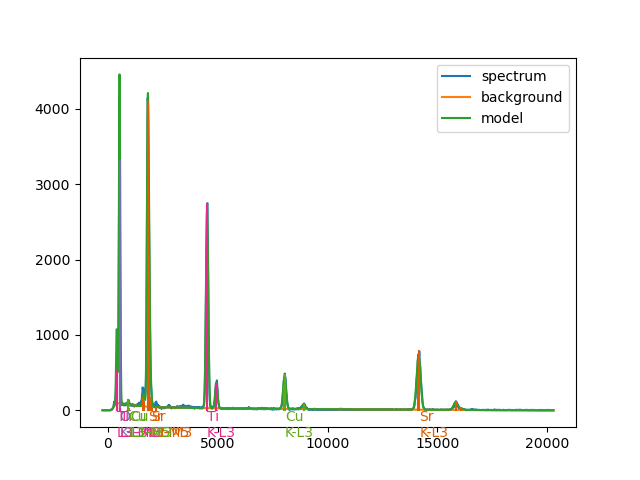

In [13]:
detector_efficiency = pyTEMlib.eds_tools.detector_response(spectrum)  # tags, spectrum.energy_scale.values[start:])
energy_scale = spectrum.energy_scale.values
start = np.searchsorted(energy_scale, 50)
E_0= spectrum.metadata['experiment']['acceleration_voltage']

bremsstrahlung = detector_efficiency * (pp[-3] + pp[-2] * (E_0 - energy_scale) / energy_scale + pp[-1] * (E_0 - energy_scale) ** 2 / energy_scale)
bremsstrahlung[:start] = 0.

plt.figure()
plt.plot(spectrum.energy_scale, spectrum, label='spectrum')
plt.plot(spectrum.energy_scale, bremsstrahlung, label='background')
plt.plot(spectrum.energy_scale, model, label='model')
pyTEMlib.eds_tools.plot_lines(spectrum.metadata['EDS'], plt.gca())
plt.legend()